In [34]:
from pathlib import Path 

PATH_DATASETS=Path("/data/bacteria/gold-standard-datasets/")   # GEBA | FDA-ARGOS | NCTC3000
PATH_TOOLS_EVALUATION=Path("/data/bacteria/tools-evaluation/") # gambit | panspace

name_dataset= "NCTC3000"

In [35]:
ids_fa = [p.stem for p in PATH_DATASETS.joinpath(f"{name_dataset}").rglob("*fna")]
len(ids_fa)

4397

## Ground truth

In [36]:
## Find ground truth 
from Bio import SeqIO
from collections import namedtuple 

# for path in  Path("/data/bacteria/ena-nctc3000").rglob("*fa"):
paths = list( PATH_DATASETS.joinpath(f"{name_dataset}").rglob("*fna"))#[0].stem

# FASTA=Path("/data/bacteria/ena-nctc3000/")

Labels=namedtuple("Labels",["sampleid","ground_truth","path_fasta"])
labels = []
for path_fa in paths:

    # path_fa = FASTA.joinpath(f"{ID}.fa")
    print(path_fa)
    with open(path_fa, "r") as fp:
        records = []
        for record in SeqIO.parse(fp, format="fasta"):
            records.append(record)
        gt = "_".join(records[0].description.lower().split(" ")[1:3])
    sampleid = path_fa.stem
    labels.append(Labels(sampleid, gt, path_fa))    

/data/bacteria/gold-standard-datasets/NCTC3000/ncbi_dataset/data/GCF_901542355.1/GCF_901542355.1_43597_H01_genomic.fna
/data/bacteria/gold-standard-datasets/NCTC3000/ncbi_dataset/data/GCF_900460175.1/GCF_900460175.1_50592_A01_genomic.fna
/data/bacteria/gold-standard-datasets/NCTC3000/ncbi_dataset/data/GCA_900478295.1/GCA_900478295.1_35377_D02_genomic.fna
/data/bacteria/gold-standard-datasets/NCTC3000/ncbi_dataset/data/GCA_900475535.1/GCA_900475535.1_44310_E01_genomic.fna
/data/bacteria/gold-standard-datasets/NCTC3000/ncbi_dataset/data/GCA_900451735.1/GCA_900451735.1_40295_H02_genomic.fna
/data/bacteria/gold-standard-datasets/NCTC3000/ncbi_dataset/data/GCF_900451045.1/GCF_900451045.1_57752_A01_genomic.fna
/data/bacteria/gold-standard-datasets/NCTC3000/ncbi_dataset/data/GCA_900475165.1/GCA_900475165.1_42731_D01_genomic.fna
/data/bacteria/gold-standard-datasets/NCTC3000/ncbi_dataset/data/GCA_901421975.1/GCA_901421975.1_34410_D01_genomic.fna
/data/bacteria/gold-standard-datasets/NCTC3000/n

In [37]:
import pandas as pd
gt_dataset = pd.DataFrame(labels)
gt_dataset.to_csv(PATH_DATASETS.joinpath(f"labels-{name_dataset}.csv"),sep="\t")

In [38]:
# ground truth
df_gt = gt_dataset

___
Comparison other tools


### GAMBIT
second column correspond to the predicted name, third column to the taxonomy rank, could be species, or genus level, it can also by empty and in that case the predicted name is empty as well. 

In [39]:
df_gambit = pd.read_csv(PATH_TOOLS_EVALUATION.joinpath(f"gambit/output-gambit-{name_dataset}.csv"))
df_gambit.head(2)

,query,predicted.name,predicted.rank,predicted.ncbi_id,predicted.threshold,closest.distance,closest.description,next.name,next.rank,next.ncbi_id,next.threshold
0,GCA_001182745.2_NCTC11134_genomic,Nocardia farcinica,species,37329.0,0.380236,0.0,[GCF_001182745.1] Nocardia farcinica (high GC ...,NaN,NaN,NaN,NaN
1,GCA_001457455.1_NCTC11397_genomic,Corynebacterium diphtheriae,species,1717.0,0.478972,0.0,[GCF_001457455.1] Corynebacterium diphtheriae ...,NaN,NaN,NaN,NaN


In [40]:
import json
import pandas as pd

from pathlib import Path
from collections import Counter, namedtuple, defaultdict

from sklearn.metrics import (
    precision_score, 
    recall_score,
    accuracy_score, 
    balanced_accuracy_score
    )



In [41]:
df_merge = pd.merge(df_gambit,df_gt, left_on="query", right_on="sampleid")
df_merge["predicted"] = df_merge["predicted.name"].apply(lambda x: "_".join(str(x).lower().split(" ")))
df_merge.head(2)


,query,predicted.name,predicted.rank,predicted.ncbi_id,predicted.threshold,closest.distance,closest.description,next.name,next.rank,next.ncbi_id,next.threshold,sampleid,ground_truth,path_fasta,predicted
0,GCA_001182745.2_NCTC11134_genomic,Nocardia farcinica,species,37329.0,0.380236,0.0,[GCF_001182745.1] Nocardia farcinica (high GC ...,NaN,NaN,NaN,NaN,GCA_001182745.2_NCTC11134_genomic,nocardia_farcinica,/data/bacteria/gold-standard-datasets/NCTC3000...,nocardia_farcinica
1,GCA_001457455.1_NCTC11397_genomic,Corynebacterium diphtheriae,species,1717.0,0.478972,0.0,[GCF_001457455.1] Corynebacterium diphtheriae ...,NaN,NaN,NaN,NaN,GCA_001457455.1_NCTC11397_genomic,corynebacterium_diphtheriae,/data/bacteria/gold-standard-datasets/NCTC3000...,corynebacterium_diphtheriae


In [42]:
classes = df_merge.ground_truth.unique()
classes = sorted(classes)
y_true, y_pred = df_merge.ground_truth, df_merge.predicted
y_true, 
y_pred

0                nocardia_farcinica
1       corynebacterium_diphtheriae
2        achromobacter_xylosoxidans
3             staphylococcus_aureus
4           fusobacterium_nucleatum
                   ...             
4392                  streptococcus
4393                  streptococcus
4394     streptococcus_dysgalactiae
4395                  streptococcus
4396          staphylococcus_aureus
Name: predicted, Length: 4397, dtype: object

In [43]:
accuracy_score(y_true, y_pred), balanced_accuracy_score(y_true, y_pred), len(classes)

/home/avila/micromamba/envs/train/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


(0.6995678871958153, 0.370083924226801, 767)

___

### PANSPACE


In [44]:
df_panspace = pd.read_csv(PATH_TOOLS_EVALUATION.joinpath(f"panspace-metric-learning/{name_dataset}/query.csv"), sep="\t")
df_panspace
# /data/bacteria/tools-evaluation/panspace/NCTC3000/query.csv

,Unnamed: 0,path_fasta,sample_id_query,sample_id_0,label_0,distance_to_0,sample_id_1,label_1,distance_to_1,sample_id_2,...,distance_to_6,sample_id_7,label_7,distance_to_7,sample_id_8,label_8,distance_to_8,sample_id_9,label_9,distance_to_9
0,0,/data/bacteria/gold-standard-datasets/NCTC3000...,GCF_900637975.1_53550_F01_genomic,SAMN00691217,actinomyces_oris,0.089161,SAMN04480050,actinomyces_oris,0.116897,SAMEA3594240,...,0.302416,SAMN00792233,actinomyces_sp._oral_taxon_414,0.332790,SAMN03197959,actinomyces_radicidentis,0.382218,SAMEA3319328,actinomyces_radicidentis,0.393202
1,1,/data/bacteria/gold-standard-datasets/NCTC3000...,GCA_900475775.1_46941_E01_genomic,SAMN03142261,corynebacterium_ulcerans,0.046175,SAMD00012381,corynebacterium_ulcerans,0.086207,SAMN07946426,...,0.289318,SAMEA104208691,corynebacterium_diphtheriae,0.293618,SAMN07946419,corynebacterium_diphtheriae,0.293662,SAMN07946403,corynebacterium_diphtheriae,0.296326
2,2,/data/bacteria/gold-standard-datasets/NCTC3000...,GCA_900636265.1_40295_B02_genomic,SAMEA1709036,staphylococcus_warneri,0.016251,SAMEA104156910,staphylococcus_warneri,0.016739,SAMEA1708677,...,0.020774,SAMEA104233605,staphylococcus_warneri,0.022387,SAMN03197943,staphylococcus_warneri,0.022615,SAMEA104156815,staphylococcus_warneri,0.023657
3,3,/data/bacteria/gold-standard-datasets/NCTC3000...,GCA_900450155.1_40311_E01_genomic,SAMN09980183,escherichia_coli,0.004945,SAMN06276504,escherichia_coli,0.005584,SAMEA3981205,...,0.006068,SAMN04870300,escherichia_coli,0.006116,SAMN08039143,escherichia_coli,0.006259,SAMN04191561,escherichia_coli,0.006288
4,4,/data/bacteria/gold-standard-datasets/NCTC3000...,GCA_900457675.1_40740_C01_genomic,SAMN06327441,staphylococcus_aureus,0.000852,SAMEA104317588,staphylococcus_aureus,0.000935,SAMN06328075,...,0.001328,SAMEA3924080,staphylococcus_aureus,0.001334,SAMN05336783,staphylococcus_aureus,0.001373,SAMN05339761,staphylococcus_aureus,0.001410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4392,4392,/data/bacteria/gold-standard-datasets/NCTC3000...,GCA_901472535.1_36734_G01_genomic,SAMN07407601,sphingobacterium_mizutaii,0.238156,SAMEA3595412,staphylococcus_aureus,0.340508,SAMN02391290,...,0.385871,SAMEA3214607,staphylococcus_sciuri,0.387514,SAMEA1929643,staphylococcus_pseudintermedius,0.387879,SAMN02391296,acinetobacter_radioresistens,0.389979
4393,4393,/data/bacteria/gold-standard-datasets/NCTC3000...,GCA_902109455.1_29840_E01_genomic,SAMN02947383,salmonella_enterica,0.000978,SAMN09788139,salmonella_enterica,0.001138,SAMN09696603,...,0.001225,SAMN10171020,salmonella_enterica,0.001260,SAMN08161557,salmonella_enterica,0.001285,SAMN08930238,salmonella_enterica,0.001286
4394,4394,/data/bacteria/gold-standard-datasets/NCTC3000...,GCF_900086555.1_34903_D01_genomic,SAMEA678207,neisseria_weaveri,0.150602,SAMN03197986,neisseria_subflava,0.178118,SAMN04477501,...,0.187828,SAMEA104416876,neisseria_subflava,0.188026,SAMN03197011,neisseria_subflava,0.190675,SAMN04480040,neisseria_subflava,0.190894
4395,4395,/data/bacteria/gold-standard-datasets/NCTC3000...,GCF_900446905.1_43721_F02_genomic,SAMEA3108940,citrobacter_sp._fdaargos_156,0.011827,SAMN03577232,citrobacter_sp._fdaargos_156,0.028797,SAMEA3108921,...,0.039633,SAMN03577179,citrobacter_sp._fdaargos_156,0.040294,SAMN03577171,citrobacter_sp._fdaargos_156,0.042686,SAMEA3107566,citrobacter_sp._fdaargos_156,0.045057


In [45]:
df_merge = pd.merge(df_panspace,df_gt, left_on="sample_id_query", right_on="sampleid")
cols_labels = [c for c in df_panspace.columns if c.startswith("label")]
df_merge["predicted"] = df_merge[cols_labels].apply(lambda row: Counter(row).most_common(1)[0][0],axis=1)
# df_merge["predicted"] = df_merge["label_0"]#.apply(lambda x: "_".join(str(x).lower().split(" ")))
df_merge.head(2)

,Unnamed: 0,path_fasta_x,sample_id_query,sample_id_0,label_0,distance_to_0,sample_id_1,label_1,distance_to_1,sample_id_2,...,sample_id_8,label_8,distance_to_8,sample_id_9,label_9,distance_to_9,sampleid,ground_truth,path_fasta_y,predicted
0,0,/data/bacteria/gold-standard-datasets/NCTC3000...,GCF_900637975.1_53550_F01_genomic,SAMN00691217,actinomyces_oris,0.089161,SAMN04480050,actinomyces_oris,0.116897,SAMEA3594240,...,SAMN03197959,actinomyces_radicidentis,0.382218,SAMEA3319328,actinomyces_radicidentis,0.393202,GCF_900637975.1_53550_F01_genomic,actinomyces_viscosus,/data/bacteria/gold-standard-datasets/NCTC3000...,actinomyces_oris
1,1,/data/bacteria/gold-standard-datasets/NCTC3000...,GCA_900475775.1_46941_E01_genomic,SAMN03142261,corynebacterium_ulcerans,0.046175,SAMD00012381,corynebacterium_ulcerans,0.086207,SAMN07946426,...,SAMN07946419,corynebacterium_diphtheriae,0.293662,SAMN07946403,corynebacterium_diphtheriae,0.296326,GCA_900475775.1_46941_E01_genomic,corynebacterium_ulcerans,/data/bacteria/gold-standard-datasets/NCTC3000...,corynebacterium_diphtheriae


In [46]:
classes = df_merge.ground_truth.unique()
classes = sorted(classes)
y_true, y_pred = df_merge.ground_truth, df_merge.predicted
y_true, 
y_pred

0                   actinomyces_oris
1        corynebacterium_diphtheriae
2             staphylococcus_warneri
3                   escherichia_coli
4              staphylococcus_aureus
                    ...             
4392           staphylococcus_aureus
4393             salmonella_enterica
4394              neisseria_subflava
4395    citrobacter_sp._fdaargos_156
4396                escherichia_coli
Name: predicted, Length: 4397, dtype: object

In [47]:
accuracy_score(y_true, y_pred), balanced_accuracy_score(y_true, y_pred), len(classes)

/home/avila/micromamba/envs/train/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


(0.7084375710711849, 0.3160965191808036, 767)

In [68]:
df_merge.query("ground_truth=='acinetobacter_calcoaceticus'")

,Unnamed: 0,path_fasta_x,sample_id_query,sample_id_0,label_0,distance_to_0,sample_id_1,label_1,distance_to_1,sample_id_2,...,sample_id_8,label_8,distance_to_8,sample_id_9,label_9,distance_to_9,sampleid,ground_truth,path_fasta_y,predicted
471,471,/data/bacteria/gold-standard-datasets/NCTC3000...,GCA_900444805.1_58932_B01_genomic,SAMEA3642846,acinetobacter_calcoaceticus,0.010568,SAMN05022873,acinetobacter_pittii,0.011958,SAMN08382337,...,SAMN01828128,acinetobacter_oleivorans,0.014943,SAMN02415076,acinetobacter_pittii,0.015393,GCA_900444805.1_58932_B01_genomic,acinetobacter_calcoaceticus,/data/bacteria/gold-standard-datasets/NCTC3000...,acinetobacter_pittii
641,641,/data/bacteria/gold-standard-datasets/NCTC3000...,GCF_900444805.1_58932_B01_genomic,SAMEA3642846,acinetobacter_calcoaceticus,0.010568,SAMN05022873,acinetobacter_pittii,0.011958,SAMN08382337,...,SAMN01828128,acinetobacter_oleivorans,0.014943,SAMN02415076,acinetobacter_pittii,0.015393,GCF_900444805.1_58932_B01_genomic,acinetobacter_calcoaceticus,/data/bacteria/gold-standard-datasets/NCTC3000...,acinetobacter_pittii


# LOGS
___

In [7]:
import pandas as pd
from pathlib import Path
from src.panspace.utils import LogInfo
info = []
loginfo = LogInfo()
# /data/bacteria/ena-nctc3000-panspace-mse/logs
for log in Path("/data/bacteria/tools-evaluation/panspace-fcgr-c/NCTC3000/logs").rglob("*log"):
    log_dict=loginfo(log)
    log_dict["task"] = log.stem.split("-")[0]
    info.append(
        log_dict
    )


In [8]:
# log.stem.split("-")[0]

In [9]:
pd.DataFrame(info).sum()

User time (seconds)                                                              101.03
System time (seconds)                                                             47.01
Maximum resident set size (kbytes)                                          146967804.0
task                                  count_kmers_kmccount_kmers_kmccount_kmers_kmcc...
dtype: object

In [10]:
pd.DataFrame(info).groupby("task")[["User time (seconds)", "Maximum resident set size (kbytes)"]].describe()

User time (seconds)                                            \
                              count       mean       std    min    25%    50%   
task                                                                            
count_kmers_kmc              4397.0   0.019302  0.007468   0.00   0.01   0.02   
fcgr                            1.0   0.100000       NaN   0.10   0.10   0.10   
list_path_fasta                 0.0        NaN       NaN    NaN    NaN    NaN   
query_index                     1.0  16.060000       NaN  16.06  16.06  16.06   

                              Maximum resident set size (kbytes)  \
                   75%    max                              count   
task                                                               
count_kmers_kmc   0.02   0.05                             4397.0   
fcgr              0.10   0.10                                1.0   
list_path_fasta    NaN    NaN                                0.0   
query_index      16.06  16.06                                1.0   

                                                                             \
                         mean          std        min        25%        50%   
task                                                                          
count_kmers_kmc  3.312274e+04  3837.400536    23936.0    29824.0    33024.0   
fcgr             2.662400e+04          NaN    26624.0    26624.0    26624.0   
list_path_fasta           NaN          NaN        NaN        NaN        NaN   
query_index      1.300476e+06          NaN  1300476.0  1300476.0  1300476.0   

                                       
                       75%        max  
task                                   
count_kmers_kmc    35584.0    47360.0  
fcgr               26624.0    26624.0  
list_path_fasta        NaN        NaN  
query_index      1300476.0  1300476.0

In [29]:
pd.DataFrame(info).groupby("task")[["User time (seconds)", "Maximum resident set size (kbytes)"]].describe()

User time (seconds)                                     \
                               count       mean       std    min    25%   
task                                                                      
count_kmers_dump              4397.0   0.012165  0.006508   0.00   0.01   
count_kmers_kmc               4397.0   0.019516  0.007879   0.00   0.01   
fcgr                          4397.0   0.466786  0.058347   0.33   0.42   
query_index                      1.0  16.460000       NaN  16.46  16.46   

                                      Maximum resident set size (kbytes)  \
                    50%    75%    max                              count   
task                                                                       
count_kmers_dump   0.01   0.02   0.03                             4397.0   
count_kmers_kmc    0.02   0.02   0.08                             4397.0   
fcgr               0.46   0.50   0.75                             4397.0   
query_index       16.46  16.46  16.46                                1.0   

                                                                              \
                          mean          std        min        25%        50%   
task                                                                           
count_kmers_dump  2.458805e+04    73.993735    24192.0    24576.0    24576.0   
count_kmers_kmc   3.314088e+04  3839.640293    24064.0    29824.0    33024.0   
fcgr              6.113274e+05   147.138359   609840.0   611268.0   611320.0   
query_index       1.307864e+06          NaN  1307864.0  1307864.0  1307864.0   

                                        
                        75%        max  
task                                    
count_kmers_dump    24576.0    24832.0  
count_kmers_kmc     35584.0    47360.0  
fcgr               611444.0   611584.0  
query_index       1307864.0  1307864.0

In [115]:
df_gambit["predicted.name"].isna().sum()

299

In [75]:
(df_gambit["predicted.rank"] == "species").sum()

1381

In [ ]:
y_pred = df_gambit["predicted.name"]
y_true = df_gambit["ground_truth"] 

In [29]:
ids_npy = [p.stem for p in Path("/data/bacteria/ena-output-panspace").rglob("*npy")]

In [30]:
len(ids_npy)

2248

In [18]:
set(ids_fa)-set(ids_npy)

set()

In [11]:
from Bio import SeqIO

FASTA=Path("/data/bacteria/ena-output/")
ID="GCA_001182745.2"

path_fa = FASTA.joinpath(f"{ID}.fa")
print(path_fa)
with open(path_fa, "r") as fp:
    records = []
    for record in SeqIO.parse(fp, format="fasta"):
        records.append(record)

/data/bacteria/ena-output/GCA_001182745.2.fa


In [13]:
for record in records:
    print(set(record.seq))

{'C', 'A', 'T', 'G'}
{'C', 'A', 'T', 'G'}
{'C', 'A', 'T', 'G'}
{'G', 'A', 'T', 'C'}
{'G', 'A', 'T', 'C'}


In [21]:
import numpy as np
from complexcgr import FCGR
fcgr = FCGR(6)

pe = {p.stem: p for p in Path("/data/bacteria/ena-output-panspace/fcgr").rglob("*npy")}


/home/avila/micromamba/envs/train/lib/python3.11/site-packages/complexcgr/fcgr.py:85: RuntimeWarning: invalid value encountered in divide
  img_rescaled = (array - m) / (M-m)
/home/avila/micromamba/envs/train/lib/python3.11/site-packages/complexcgr/fcgr.py:90: RuntimeWarning: invalid value encountered in cast
  img_array = np.array(img_array, dtype=dtype)


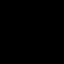

In [23]:
id_ = "GCA_900447785.1"
fcgr.plot(np.load(pe[id_]))

In [24]:
np.load(pe[id_])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])